In [130]:
import os               # import os to walk file path
import pandas as pd     # import pandas for dataframes
import numpy as np      
import json
import statistics
import time

from rouge import Rouge
import transformers
from tqdm.auto import tqdm

In [131]:
# Relative path
path_to_data = 'rssDevData/'

# Names of 5 blog categories to import 
blogs = ['DavidWalsh','DeveloperDotCom']

# Identify key to blog text in JSON file
key = 'text'

# Initialize empty data frame
text_data = pd.DataFrame()

#Initialize counter to keep track of files that fail
files_not_read = 0

category_sizes = [] # To store number of blog articles by category
labels = [] # To store "true" labels ->  [0, 1, 2, 3, 4]
label = 0

for blog in blogs :
    current_blog_category_count = 0
    
    path_to_blogs = path_to_data + blog 
    
    for root, dir, files in os.walk(path_to_blogs) :
        # get list of only json files
        json_files = [pos_json for pos_json in files if pos_json.endswith('.json')]

        for j in json_files :
            with open(root + '/' + j, 'r') as f:
                try:
                    data = json.load(f)
                    if len(data[key]) > 200 :
                        try : # fails when there is more than one json object in the file 
                            text_data = pd.concat([text_data, pd.DataFrame(data, index=[0])], ignore_index=True) 
                            current_blog_category_count += 1 
                            labels.append(label) 
                        except : 
                            files_not_read += 1
                except:
                    print(j)
print('Files not read in: ', str(files_not_read))
print('Files read in: ', str(len(text_data)))
print(text_data.head())

5-web-design-trends-.json
locate-empty-directo.json
overview-of-spiral-s.json
Files not read in:  0
Files read in:  27
                                     header_title  \
0   Convert Fahrenheit to Celsius with JavaScript   
1     Create a Thumbnail From a Video with ffmpeg   
2                      CSS ::file-selector-button   
3                Customizing HTML Form Validation   
4  Detect Browser Bars Visibility with JavaScript   

                              date  \
0  Wed, 26 Oct 2022 10:19:49 +0000   
1  Tue, 25 Oct 2022 09:28:58 +0000   
2  Mon, 20 Feb 2023 09:50:57 +0000   
3  Mon, 09 Jan 2023 10:57:00 +0000   
4  Fri, 30 Dec 2022 01:36:35 +0000   

                                                text  \
0  The United States is one of the last bodies th...   
1  Creating a thumbnail to represent a video is a...   
2  We all love beautifully styled form controls b...   
3  Form validation has always been my least favor...   
4  It's one thing to know about what's in the bro... 

In [132]:
text_data.head()

,header_title,date,text,summary,url
0,Convert Fahrenheit to Celsius with JavaScript,"Wed, 26 Oct 2022 10:19:49 +0000",The United States is one of the last bodies th...,The article discusses the importance of provid...,https://davidwalsh.name/fahrenheit-celsius-jav...
1,Create a Thumbnail From a Video with ffmpeg,"Tue, 25 Oct 2022 09:28:58 +0000",Creating a thumbnail to represent a video is a...,The article discusses several topics related t...,https://davidwalsh.name/create-thumbnail-ffmpeg
2,CSS ::file-selector-button,"Mon, 20 Feb 2023 09:50:57 +0000",We all love beautifully styled form controls b...,This article discusses various web development...,https://davidwalsh.name/css-file-selector-button
3,Customizing HTML Form Validation,"Mon, 09 Jan 2023 10:57:00 +0000",Form validation has always been my least favor...,The article discusses how to control native fo...,https://davidwalsh.name/html5-validation
4,Detect Browser Bars Visibility with JavaScript,"Fri, 30 Dec 2022 01:36:35 +0000",It's one thing to know about what's in the bro...,The article discusses how developers can gain ...,https://davidwalsh.name/detect-browser-bars


In [133]:
import sumy
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer 
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

In [134]:
def summarizator_LexRank(text):
    start = time.time()
    SENTENCES_COUNT = 3
    language = 'english'

    sumario_summy = []
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    summarizer = LexRankSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    summary = []
        
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    summary = ' '.join(summary)
    sumario_summy.append(summary)
    end = time.time()
    LexRank_time = (end - start)
        
#     return " ".join(sumario_summy)
    return (LexRank_time,sumario_summy)

In [135]:
# summarizator_LexRank(text_data['text'][0])[0]

In [136]:
text_data["Sumy_LexRank"] = text_data["text"].apply(summarizator_LexRank)

In [137]:
def summarizator_Luhn(text):
    start = time.time()
    SENTENCES_COUNT = 3
    language = 'english'

    sumario_summy = []
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    summarizer = LuhnSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    summary = []
        
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    summary = ' '.join(summary)
    sumario_summy.append(summary)
    end = time.time()
    Luhn_time = (end - start)
        
#     return " ".join(sumario_summy)
    return (Luhn_time,sumario_summy)

In [138]:
text_data["Sumy_Luhn"] = text_data["text"].apply(summarizator_Luhn)

In [139]:
def summarizator_Lsa(text):
    start = time.time()
    SENTENCES_COUNT = 3
    language = 'english'

    sumario_summy = []
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    summarizer = LsaSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    summary = []
        
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    summary = ' '.join(summary)
    sumario_summy.append(summary)
    end = time.time()
    Lsa_time = (end - start)
        
#     return " ".join(sumario_summy)
    return (Lsa_time,sumario_summy)

In [140]:
text_data["Sumy_Lsa"] = text_data["text"].apply(summarizator_Lsa)

In [141]:
def summarizator_TextRank(text):
    start = time.time()
    SENTENCES_COUNT = 3
    language = 'english'

    sumario_summy = []
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    summarizer = TextRankSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    summary = []
        
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    summary = ' '.join(summary)
    sumario_summy.append(summary)
    end = time.time()
    TextRank_time = (end - start)
        
#     return " ".join(sumario_summy)
    return (TextRank_time,sumario_summy)

In [142]:
text_data["Sumy_TextRank"] = text_data["text"].apply(summarizator_TextRank)

In [143]:
text_data.head()

,header_title,date,text,summary,url,Sumy_LexRank,Sumy_Luhn,Sumy_Lsa,Sumy_TextRank
0,Convert Fahrenheit to Celsius with JavaScript,"Wed, 26 Oct 2022 10:19:49 +0000",The United States is one of the last bodies th...,The article discusses the importance of provid...,https://davidwalsh.name/fahrenheit-celsius-jav...,"(0.023183345794677734, [Because we're arrogant...","(0.013034820556640625, [The United States is o...","(0.015002727508544922, [I provide training and...","(0.012234687805175781, [Let's took at how you ..."
1,Create a Thumbnail From a Video with ffmpeg,"Tue, 25 Oct 2022 09:28:58 +0000",Creating a thumbnail to represent a video is a...,The article discusses several topics related t...,https://davidwalsh.name/create-thumbnail-ffmpeg,"(0.0073664188385009766, [Let's view how we can...","(0.007124423980712891, [Let's view how we can ...","(0.007992029190063477, [Creating a thumbnail t...","(0.008648395538330078, [Let's view how we can ..."
2,CSS ::file-selector-button,"Mon, 20 Feb 2023 09:50:57 +0000",We all love beautifully styled form controls b...,This article discusses various web development...,https://davidwalsh.name/css-file-selector-button,"(0.010890722274780273, [We all love beautifull...","(0.007870197296142578, [We all love beautifull...","(0.009972810745239258, [Unfortunately that som...","(0.009237527847290039, [We all love beautifull..."
3,Customizing HTML Form Validation,"Mon, 09 Jan 2023 10:57:00 +0000",Form validation has always been my least favor...,The article discusses how to control native fo...,https://davidwalsh.name/html5-validation,"(0.004805326461791992, [You need to duplicate ...","(0.009737730026245117, [ValidityState looks so...","(0.008615732192993164, [Â Our effort to...With...","(0.0, [Did you know, however, that you can con..."
4,Detect Browser Bars Visibility with JavaScript,"Fri, 30 Dec 2022 01:36:35 +0000",It's one thing to know about what's in the bro...,The article discusses how developers can gain ...,https://davidwalsh.name/detect-browser-bars,"(0.011473655700683594, [We've gotten past dete...","(0.0030515193939208984, [It's one thing to kno...","(0.006100654602050781, [My name is Mark (or @i...","(0.014116048812866211, [We've gotten past dete..."


In [144]:
text_data.isnull().sum()

header_title     0
date             0
text             0
summary          0
url              0
Sumy_LexRank     0
Sumy_Luhn        0
Sumy_Lsa         0
Sumy_TextRank    0
dtype: int64

In [145]:
# text_data['Sumy_LexRank'][0][0]

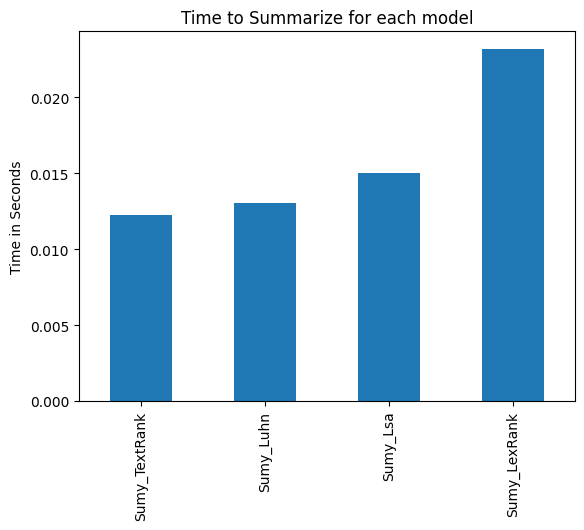

In [146]:
# Create a bar plot to display time of summarization for each model

import matplotlib.pyplot as plot
time_array = {'Model': ["Sumy_LexRank", "Sumy_Luhn", "Sumy_Lsa", "Sumy_TextRank"],
            'Times': [text_data['Sumy_LexRank'][0][0], text_data['Sumy_Luhn'][0][0],
                      text_data['Sumy_Lsa'][0][0], text_data['Sumy_TextRank'][0][0]]}
df_time = pd.DataFrame(data=time_array)
df_time.sort_values('Times').plot.bar(
    x="Model", y="Times", title="Time to Summarize for each model", ylabel="Time in Seconds", xlabel="", legend=False)
plot.show()

In [147]:
# len(text_data['Sumy_LexRank'][0][1][0])

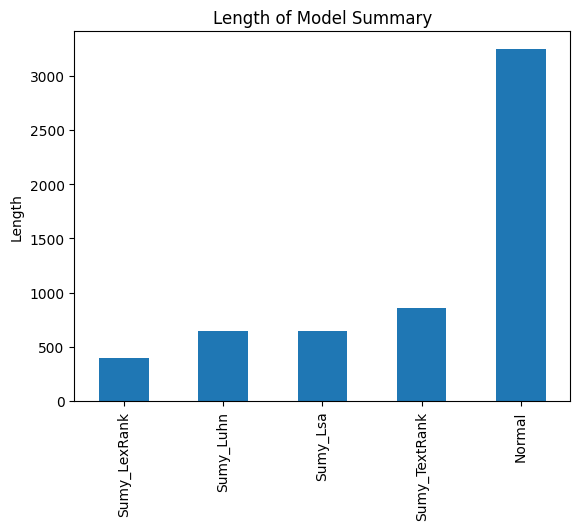

In [148]:
# Create a bar plot to display length of summary for each model

length_dict = {"Model": ["Normal", "Sumy_LexRank", "Sumy_Luhn", "Sumy_Lsa", "Sumy_TextRank"], 
               "Length": [(len(text_data['text'][0])), (len(text_data['Sumy_LexRank'][0][1][0])), (len(text_data['Sumy_Luhn'][0][1][0])), 
                          (len(text_data['Sumy_Lsa'][0][1][0])), (len(text_data['Sumy_TextRank'][0][1][0]))]}
                          
df_length = pd.DataFrame(data=length_dict)
df_length.sort_values('Length').plot.bar(x="Model", y="Length", title="Length of Model Summary", ylabel="Length", xlabel="", legend=False)
plot.show()

## Rouge Score

In [149]:
# Using Rouge measure to compare different methods
rouge = Rouge()

# Compare chatgpt summary with Summy_LexRank

text_data['Sumy_LexRank'] = [x[1][0] for x in text_data['Sumy_LexRank']]
scores1 = rouge.get_scores(text_data["summary"], text_data["Sumy_LexRank"])
df_result1 = pd.DataFrame(scores1)
df_result1.head()

,rouge-1,rouge-2,rouge-l
0,"{'r': 0.23214285714285715, 'p': 0.166666666666...","{'r': 0.058823529411764705, 'p': 0.03773584905...","{'r': 0.21428571428571427, 'p': 0.153846153846..."
1,"{'r': 0.42857142857142855, 'p': 0.233766233766...","{'r': 0.13725490196078433, 'p': 0.064220183486...","{'r': 0.40476190476190477, 'p': 0.220779220779..."
2,"{'r': 0.39285714285714285, 'p': 0.301369863013...","{'r': 0.14754098360655737, 'p': 0.101123595505...","{'r': 0.3392857142857143, 'p': 0.2602739726027..."
3,"{'r': 0.3157894736842105, 'p': 0.3478260869565...","{'r': 0.07954545454545454, 'p': 0.07, 'f': 0.0...","{'r': 0.2894736842105263, 'p': 0.3188405797101..."
4,"{'r': 0.30952380952380953, 'p': 0.351351351351...","{'r': 0.1111111111111111, 'p': 0.1145833333333...","{'r': 0.2976190476190476, 'p': 0.3378378378378..."


In [150]:
# Compare chatgpt summary with Sumy_Lsa

text_data['Sumy_Lsa'] = [x[1][0] for x in text_data['Sumy_Lsa']]
scores2 = rouge.get_scores(text_data["summary"], text_data["Sumy_Lsa"])
df_result2 = pd.DataFrame(scores2)

In [151]:
# Compare chatgpt summary with Sumy_TextRank

text_data['Sumy_TextRank'] = [x[1][0] for x in text_data['Sumy_TextRank']]
scores3 = rouge.get_scores(text_data["summary"], text_data["Sumy_TextRank"])
df_result3 = pd.DataFrame(scores3)

In [152]:
# Compare chatgpt summary with Sumy_Luhn

text_data['Sumy_Luhn'] = [x[1][0] for x in text_data['Sumy_Luhn']]
scores4 = rouge.get_scores(text_data["summary"], text_data["Sumy_Luhn"])
df_result4 = pd.DataFrame(scores4)

In [153]:
print('Sumy_LexRank:',df_result1['rouge-1'][20],'\n','Sumy_Lsa:', df_result2['rouge-1'][20] ,'\n','Sumy_TextRank:', df_result3['rouge-1'][20],'\n','Sumy_Luhn:', df_result4['rouge-1'][20])

Sumy_LexRank: {'r': 0.2440944881889764, 'p': 0.3924050632911392, 'f': 0.30097086905787546} 
 Sumy_Lsa: {'r': 0.28205128205128205, 'p': 0.27848101265822783, 'f': 0.28025477207026656} 
 Sumy_TextRank: {'r': 0.23134328358208955, 'p': 0.3924050632911392, 'f': 0.2910798075399502} 
 Sumy_Luhn: {'r': 0.21341463414634146, 'p': 0.4430379746835443, 'f': 0.28806583923317924}


In [154]:
# Calculate the mean value of Rouge measure for Sumy_LexRank

f_rouge_1_LexRank = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result1)):
    r = df_result1['rouge-1'][i]['f']
    f_rouge_1_LexRank.append(r)
    k = df_result1['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result1['rouge-l'][i]['f']
    f_rouge_l.append(h)

print('result for Sumy_LexRank')
print('mean_rouge_1 = ', np.mean(f_rouge_1_LexRank))
print('mean_rouge_2 = ', np.mean(f_rouge_2))
print('mean_rouge_l = ', np.mean(f_rouge_l))

result for Sumy_LexRank
mean_rouge_1 =  0.29401606039048134
mean_rouge_2 =  0.09588269689366793
mean_rouge_l =  0.26702224418029985


In [155]:
# Calculate the mean value of Rouge measure for Sumy_Lsa

f_rouge_1_Lsa = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result2)):
    r = df_result2['rouge-1'][i]['f']
    f_rouge_1_Lsa.append(r)
    k = df_result2['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result2['rouge-l'][i]['f']
    f_rouge_l.append(h)

print('result for Sumy_Lsa')
print('mean_rouge_1 = ', np.mean(f_rouge_1_Lsa))
print('mean_rouge_2 = ', np.mean(f_rouge_2))
print('mean_rouge_l = ', np.mean(f_rouge_l))

result for Sumy_Lsa
mean_rouge_1 =  0.27094191264626183
mean_rouge_2 =  0.0723606201385509
mean_rouge_l =  0.24089593290018835


In [156]:
# Calculate the mean value of Rouge measure for Sumy_TextRank

f_rouge_1_TextRank = []
f_rouge_2_TextRank = []
f_rouge_l_TextRank = []

for i in range(len(df_result3)):
    r = df_result3['rouge-1'][i]['f']
    f_rouge_1_TextRank.append(r)
    k = df_result3['rouge-2'][i]['f']
    f_rouge_2_TextRank.append(k)
    h = df_result3['rouge-l'][i]['f']
    f_rouge_l_TextRank.append(h)

print('result for Sumy_TextRank')
print('mean_rouge_1 = ', np.mean(f_rouge_1_TextRank))
print('mean_rouge_2 = ', np.mean(f_rouge_2_TextRank))
print('mean_rouge_l = ', np.mean(f_rouge_l_TextRank))

result for Sumy_TextRank
mean_rouge_1 =  0.32637613770511437
mean_rouge_2 =  0.1286421375264844
mean_rouge_l =  0.28723770724255904


In [157]:
# Create a dataframe and Calculate the mean value of Rouge measure for Sumy_Luhn

f_rouge_1_Luhn = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result4)):
    r = df_result4['rouge-1'][i]['f']
    f_rouge_1_Luhn.append(r)
    k = df_result4['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result4['rouge-l'][i]['f']
    f_rouge_l.append(h)

print('result for Sumy_Luhn')
print('mean_rouge_1 = ', np.mean(f_rouge_1_Luhn))
print('mean_rouge_2 = ', np.mean(f_rouge_2))
print('mean_rouge_l = ', np.mean(f_rouge_l))

result for Sumy_Luhn
mean_rouge_1 =  0.31995125829339166
mean_rouge_2 =  0.12612490297098547
mean_rouge_l =  0.2804113203176847


In [158]:
# Import libraries for visualization

import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
# Create a dataframe of f_rouge for all methods for each row

data = {'f_rouge_1_LexRank':f_rouge_1_LexRank,'f_rouge_1_Lsa':f_rouge_1_Lsa,'f_rouge_1_TextRank':f_rouge_1_TextRank,'f_rouge_1_Luhn':f_rouge_1_Luhn}
# columns = ['f_rouge_1_LexRank','f_rouge_1_Lsa','f_rouge_1_TextRank','f_rouge_1_Luhn']
df =pd.DataFrame(data)
df.head()

,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn
0,0.194030,0.149068,0.196532,0.225352
1,0.302521,0.285714,0.259887,0.259887
2,0.341085,0.243902,0.257143,0.243902
3,0.331034,0.186667,0.324675,0.283784
4,0.329114,0.168421,0.296296,0.369427


In [160]:
# Statistical info of df
df.describe()

,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn
count,27.000000,27.000000,27.000000,27.000000
mean,0.294016,0.270942,0.326376,0.319951
std,0.082866,0.075441,0.071658,0.068837
min,0.160920,0.145985,0.196532,0.195402
25%,0.235352,0.213740,0.264731,0.267357
50%,0.285714,0.274510,0.312500,0.324561
75%,0.345725,0.311314,0.382766,0.359896
max,0.458498,0.419580,0.468750,0.468750


(array([0, 1, 2, 3]),
 [Text(0, 0, 'f_rouge_1_LexRank'),
  Text(1, 0, 'f_rouge_1_Lsa'),
  Text(2, 0, 'f_rouge_1_TextRank'),
  Text(3, 0, 'f_rouge_1_Luhn')])

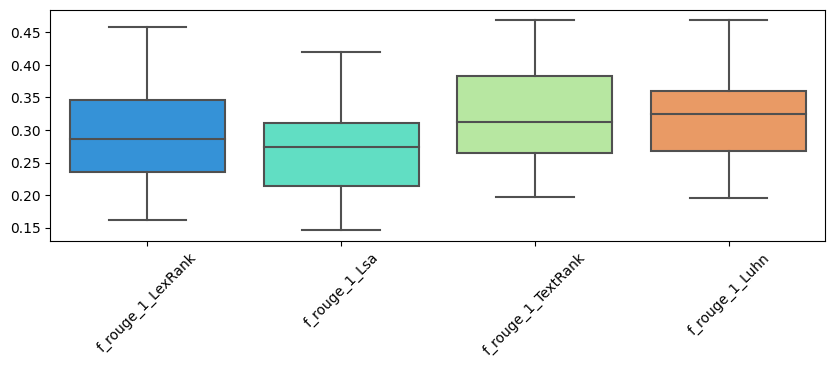

In [161]:
# Create a boxplot for different methods

plt.figure(figsize=(10, 3))
sns.boxplot(data=df, palette='rainbow')
plt.xticks(rotation=45)

### The figure above illustrates that TextRank provides the best value in comparison with other methods

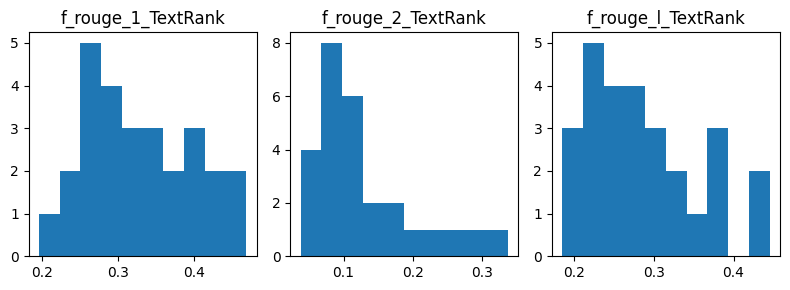

In [162]:
# Create histogram to display the distribution of f_rouge for TextRank method

plt.figure(figsize=(8, 3))

plt.subplot(1,3,1)
plt.hist(f_rouge_1_TextRank, bins = 10)
plt.title('f_rouge_1_TextRank')

plt.subplot(1,3,2)
plt.hist(f_rouge_2_TextRank, bins = 10)
plt.title('f_rouge_2_TextRank')

plt.subplot(1,3,3)
plt.hist(f_rouge_l_TextRank, bins = 10)
plt.title('f_rouge_l_TextRank')

plt.tight_layout()

## BERT Score

https://www.kaggle.com/code/shreyasadhari123/summarization

In [163]:
from evaluate import load
bertscore = load("bertscore")

In [164]:
text_data.head()

,header_title,date,text,summary,url,Sumy_LexRank,Sumy_Luhn,Sumy_Lsa,Sumy_TextRank
0,Convert Fahrenheit to Celsius with JavaScript,"Wed, 26 Oct 2022 10:19:49 +0000",The United States is one of the last bodies th...,The article discusses the importance of provid...,https://davidwalsh.name/fahrenheit-celsius-jav...,Because we're arrogant and feel like we don't ...,The United States is one of the last bodies th...,I provide training and documentation to the cu...,Let's took at how you can convert between Fahr...
1,Create a Thumbnail From a Video with ffmpeg,"Tue, 25 Oct 2022 09:28:58 +0000",Creating a thumbnail to represent a video is a...,The article discusses several topics related t...,https://davidwalsh.name/create-thumbnail-ffmpeg,Let's view how we can create a preview thumbna...,Let's view how we can create a preview thumbna...,Creating a thumbnail to represent a video is a...,Let's view how we can create a preview thumbna...
2,CSS ::file-selector-button,"Mon, 20 Feb 2023 09:50:57 +0000",We all love beautifully styled form controls b...,This article discusses various web development...,https://davidwalsh.name/css-file-selector-button,We all love beautifully styled form controls b...,We all love beautifully styled form controls b...,Unfortunately that sometimes comes at the cost...,We all love beautifully styled form controls b...
3,Customizing HTML Form Validation,"Mon, 09 Jan 2023 10:57:00 +0000",Form validation has always been my least favor...,The article discusses how to control native fo...,https://davidwalsh.name/html5-validation,You need to duplicate validation on both clien...,ValidityState looks something like this:Each p...,"Â Our effort to...With Firefox OS, asm.js, and...","Did you know, however, that you can control na..."
4,Detect Browser Bars Visibility with JavaScript,"Fri, 30 Dec 2022 01:36:35 +0000",It's one thing to know about what's in the bro...,The article discusses how developers can gain ...,https://davidwalsh.name/detect-browser-bars,We've gotten past detecting which browser the ...,It's one thing to know about what's in the bro...,My name is Mark (or @integralist if Twitter ha...,We've gotten past detecting which browser the ...


In [165]:
# refs = text_data['summary']

In [166]:
# cands=text_data['Sumy_LexRank']

In [167]:
refs = text_data['summary']
cands=text_data['Sumy_LexRank']
results_Sumy_LexRank = bertscore.compute(predictions=cands, references=refs, lang="en")

In [168]:
# print('BERT SCORE Sumy_LexRank')
# print('Precision',np.mean(results_Sumy_LexRank['precision']))
# print('Recall',np.mean(results_Sumy_LexRank['recall']))
# print('F1',np.mean(results_Sumy_LexRank['f1']))

In [169]:
refs = text_data['summary']
cands=text_data['Sumy_Luhn']
results_Sumy_Luhn = bertscore.compute(predictions=cands, references=refs, lang="en")

In [170]:
refs = text_data['summary']
cands=text_data['Sumy_Lsa']
results_Sumy_Lsa = bertscore.compute(predictions=cands, references=refs, lang="en")

In [171]:
refs = text_data['summary']
cands=text_data['Sumy_TextRank']
results_Sumy_TextRank = bertscore.compute(predictions=cands, references=refs, lang="en")

In [172]:
# Create a dataframe of f_rouge for all methods for each row

data = {'f_BERT_LexRank':results_Sumy_LexRank['f1'],'f_BERT_Lsa':results_Sumy_Lsa['f1'],'f_BERT_TextRank':results_Sumy_TextRank['f1'],'f_BERT_Luhn':results_Sumy_Luhn['f1']}
# columns = ['f_rouge_1_LexRank','f_rouge_1_Lsa','f_rouge_1_TextRank','f_rouge_1_Luhn']
df_BERT =pd.DataFrame(data)
df_BERT.head()

,f_BERT_LexRank,f_BERT_Lsa,f_BERT_TextRank,f_BERT_Luhn
0,0.857637,0.827806,0.836341,0.849254
1,0.879835,0.872168,0.851997,0.851997
2,0.877120,0.878063,0.860555,0.879515
3,0.861409,0.818129,0.870264,0.864183
4,0.861340,0.816297,0.859443,0.863831


In [173]:
df_BERT.describe()

,f_BERT_LexRank,f_BERT_Lsa,f_BERT_TextRank,f_BERT_Luhn
count,27.000000,27.000000,27.000000,27.000000
mean,0.858352,0.843704,0.861561,0.862184
std,0.017895,0.018783,0.015861,0.013350
min,0.819762,0.816202,0.833592,0.838521
25%,0.845959,0.829109,0.852259,0.855920
50%,0.859439,0.841516,0.859443,0.860880
75%,0.871690,0.855747,0.874323,0.869335
max,0.895484,0.878063,0.893886,0.893886


(array([0, 1, 2, 3]),
 [Text(0, 0, 'f_BERT_LexRank'),
  Text(1, 0, 'f_BERT_Lsa'),
  Text(2, 0, 'f_BERT_TextRank'),
  Text(3, 0, 'f_BERT_Luhn')])

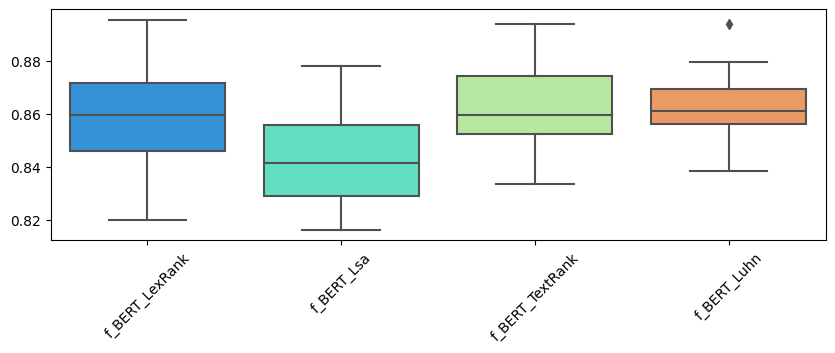

In [174]:
# Create a boxplot for different methods

plt.figure(figsize=(10, 3))
sns.boxplot(data=df_BERT, palette='rainbow')
plt.xticks(rotation=45)

## BLEU Score

In [175]:
import nltk

In [176]:
refs = text_data['summary'][0]
cands=text_data['Sumy_TextRank'][0]
BLEUscore = nltk.translate.bleu_score.sentence_bleu([refs], cands)
print(f"BLEUscore : {BLEUscore}")

BLEUscore : 0.4401155179113164


In [177]:
BLEUscore_TextRank = []
BLEUscore_Luhn = []
BLEUscore_Lsa = []
BLEUscore_LexRank = []


for i in range(len(text_data)):
    B_TextRank = nltk.translate.bleu_score.sentence_bleu([text_data['summary'][i]], text_data['Sumy_TextRank'][i])
    BLEUscore_TextRank.append(B_TextRank)
    
    B_Luhn = nltk.translate.bleu_score.sentence_bleu([text_data['summary'][i]], text_data['Sumy_Luhn'][i])
    BLEUscore_Luhn.append(B_Luhn)
    
    B_Lsa = nltk.translate.bleu_score.sentence_bleu([text_data['summary'][i]], text_data['Sumy_Lsa'][i])
    BLEUscore_Lsa.append(B_Lsa)
    
    B_LexRank = nltk.translate.bleu_score.sentence_bleu([text_data['summary'][i]], text_data['Sumy_LexRank'][i])
    BLEUscore_LexRank.append(B_LexRank)

# Create a dataframe of BLEU Score for all methods for each row

data = {'BLEUscore_LexRank':BLEUscore_LexRank,'BLEUscore_Lsa':BLEUscore_Lsa,'BLEUscore_TextRank':BLEUscore_TextRank,'BLEUscore_Luhn':BLEUscore_Luhn}
df_BLEU =pd.DataFrame(data)
df_BLEU.head()

,BLEUscore_LexRank,BLEUscore_Lsa,BLEUscore_TextRank,BLEUscore_Luhn
0,0.227204,0.356445,0.440116,0.431305
1,0.229954,0.146866,0.456284,0.456284
2,0.318465,0.281908,0.409927,0.329886
3,0.395938,0.330231,0.511212,0.528664
4,0.554367,0.321423,0.473737,0.599384


In [178]:
df_BLEU.describe()

,BLEUscore_LexRank,BLEUscore_Lsa,BLEUscore_TextRank,BLEUscore_Luhn
count,27.000000,27.000000,27.000000,27.000000
mean,0.339979,0.391444,0.460064,0.435042
std,0.147202,0.093026,0.079768,0.092001
min,0.080416,0.146866,0.234645,0.245184
25%,0.234552,0.326295,0.425021,0.367395
50%,0.319729,0.398388,0.463539,0.467176
75%,0.481572,0.448118,0.497593,0.494428
max,0.582920,0.527710,0.598859,0.599384


(array([0, 1, 2, 3]),
 [Text(0, 0, 'BLEUscore_LexRank'),
  Text(1, 0, 'BLEUscore_Lsa'),
  Text(2, 0, 'BLEUscore_TextRank'),
  Text(3, 0, 'BLEUscore_Luhn')])

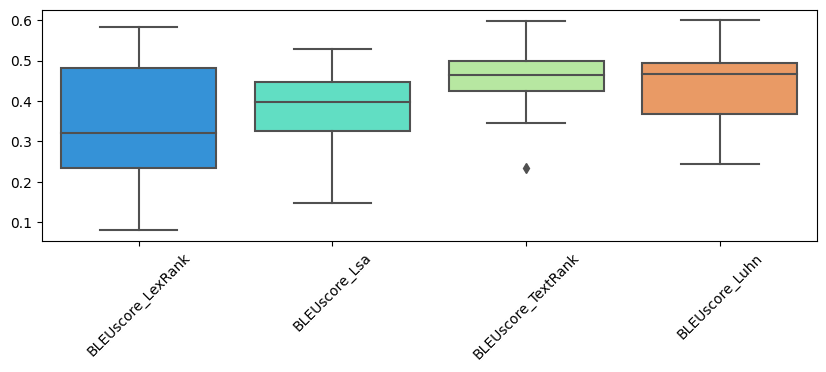

In [179]:
# Create a boxplot for different methods

plt.figure(figsize=(10, 3))
sns.boxplot(data=df_BLEU, palette='rainbow')
plt.xticks(rotation=45)

In [180]:
df.head()

,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn
0,0.194030,0.149068,0.196532,0.225352
1,0.302521,0.285714,0.259887,0.259887
2,0.341085,0.243902,0.257143,0.243902
3,0.331034,0.186667,0.324675,0.283784
4,0.329114,0.168421,0.296296,0.369427


In [181]:
df['text']= text_data['text']

In [182]:
#Move last Column to First Column
new_cols = ["text","f_rouge_1_LexRank","f_rouge_1_Lsa","f_rouge_1_TextRank","f_rouge_1_Luhn"]
df=df[new_cols]
df.head()

,text,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn
0,The United States is one of the last bodies th...,0.194030,0.149068,0.196532,0.225352
1,Creating a thumbnail to represent a video is a...,0.302521,0.285714,0.259887,0.259887
2,We all love beautifully styled form controls b...,0.341085,0.243902,0.257143,0.243902
3,Form validation has always been my least favor...,0.331034,0.186667,0.324675,0.283784
4,It's one thing to know about what's in the bro...,0.329114,0.168421,0.296296,0.369427


In [183]:
len(df['text'][0].split())

536

In [184]:
def length(text):
    return len(text.split())

In [185]:
length(df['text'][0])

536

In [186]:
df['Length'] = df['text'].apply(length)

In [187]:
def mean_word(text):
    mylist=[]
    for x in (text.split()):
        mylist.append(len(x))
    return np.mean(mylist)

In [188]:
df['Average_Word_Length'] = df['text'].apply(mean_word)

In [189]:
df.head()

,text,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn,Length,Average_Word_Length
0,The United States is one of the last bodies th...,0.194030,0.149068,0.196532,0.225352,536,5.048507
1,Creating a thumbnail to represent a video is a...,0.302521,0.285714,0.259887,0.259887,298,5.124161
2,We all love beautifully styled form controls b...,0.341085,0.243902,0.257143,0.243902,326,5.199387
3,Form validation has always been my least favor...,0.331034,0.186667,0.324675,0.283784,443,5.207675
4,It's one thing to know about what's in the bro...,0.329114,0.168421,0.296296,0.369427,325,4.960000


In [190]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [191]:
df['text'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)
df = df.reset_index()

# Remove text if lenght is less than 200
df = df.loc[df.text.str.len() > 200].reset_index(drop=True)

# function to clean data

#lower case
#remove stop words
#lemmatization

def cleanData(doc):
    doc = doc.lower()
    doc = nlp(doc)
    tokens = [tokens.lower_ for tokens in doc]
    tokens = [tokens for tokens in doc if (tokens.is_stop == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_punct == False)]
    final_token = [token.lemma_ for token in tokens]
    
    return " ".join(final_token)

In [192]:
df= df.drop(['index'],axis=1)

In [193]:
df.head()

,text,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn,Length,Average_Word_Length
0,The United States is one of the last bodies th...,0.194030,0.149068,0.196532,0.225352,536,5.048507
1,Creating a thumbnail to represent a video is a...,0.302521,0.285714,0.259887,0.259887,298,5.124161
2,We all love beautifully styled form controls b...,0.341085,0.243902,0.257143,0.243902,326,5.199387
3,Form validation has always been my least favor...,0.331034,0.186667,0.324675,0.283784,443,5.207675
4,It's one thing to know about what's in the bro...,0.329114,0.168421,0.296296,0.369427,325,4.960000


In [194]:
df['clean'] = df.apply(lambda row:cleanData (row['text']),axis=1)

In [195]:
df.head()

,text,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn,Length,Average_Word_Length,clean
0,The United States is one of the last bodies th...,0.194030,0.149068,0.196532,0.225352,536,5.048507,united states body refuse implement celsius te...
1,Creating a thumbnail to represent a video is a...,0.302521,0.285714,0.259887,0.259887,298,5.124161,create thumbnail represent video frequent task...
2,We all love beautifully styled form controls b...,0.341085,0.243902,0.257143,0.243902,326,5.199387,love beautifully style form control difference...
3,Form validation has always been my least favor...,0.331034,0.186667,0.324675,0.283784,443,5.207675,form validation favorite web development need ...
4,It's one thing to know about what's in the bro...,0.329114,0.168421,0.296296,0.369427,325,4.960000,thing know browser document insight user brows...


In [196]:
#function to POS tagging
def POS(clean):
    pos_list=[]
    clean = nlp(clean)
    for token in clean:
        pos_list.append(token.pos_)
    return(pos_list)  

In [197]:
df['pos_tag'] = df.apply(lambda row:POS (row['clean']),axis=1)

In [198]:
df.head()

,text,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn,Length,Average_Word_Length,clean,pos_tag
0,The United States is one of the last bodies th...,0.194030,0.149068,0.196532,0.225352,536,5.048507,united states body refuse implement celsius te...,"[PROPN, PROPN, PROPN, VERB, VERB, NOUN, NOUN, ..."
1,Creating a thumbnail to represent a video is a...,0.302521,0.285714,0.259887,0.259887,298,5.124161,create thumbnail represent video frequent task...,"[VERB, NOUN, VERB, NOUN, ADJ, NOUN, ADJ, ADJ, ..."
2,We all love beautifully styled form controls b...,0.341085,0.243902,0.257143,0.243902,326,5.199387,love beautifully style form control difference...,"[VERB, ADV, NOUN, NOUN, NOUN, NOUN, VERB, NOUN..."
3,Form validation has always been my least favor...,0.331034,0.186667,0.324675,0.283784,443,5.207675,form validation favorite web development need ...,"[VERB, NOUN, ADJ, NOUN, NOUN, VERB, ADJ, NOUN,..."
4,It's one thing to know about what's in the bro...,0.329114,0.168421,0.296296,0.369427,325,4.960000,thing know browser document insight user brows...,"[NOUN, VERB, NOUN, NOUN, PROPN, NOUN, NOUN, SP..."


https://www.kaggle.com/code/hrmello/part-of-speech-tagging

In [199]:
from collections import Counter

In [200]:
def find_no_class(count, class_name = ""):
    total = 0
    for key in count.keys():
        if key.startswith(class_name):
            total += count[key]
            
            
    return total

def get_classes(row, grammatical_class = ""):
    count = Counter(row["pos_tag"])
    return find_no_class(count, class_name = grammatical_class)/len(row["pos_tag"])

#df["freqAdverbs"] = df.apply(lambda row: get_classes(row, "RB"), axis = 1)
df["freqVerbs"] = df.apply(lambda row: get_classes(row, "VERB"), axis = 1)
#df["freqAdjectives"] = df.apply(lambda row: get_classes(row, "JJ"), axis = 1)
df["freqNouns"] = df.apply(lambda row: get_classes(row, "NOUN"), axis = 1)

df.sample(5)

,text,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn,Length,Average_Word_Length,clean,pos_tag,freqVerbs,freqNouns
24,"The Adaptive Project Framework, or APF, is an ...",0.431535,0.298969,0.398437,0.398437,699,6.165951,adaptive project framework apf emerge project ...,"[ADJ, NOUN, NOUN, PROPN, PROPN, NOUN, NOUN, NO...",0.127711,0.597590
2,We all love beautifully styled form controls b...,0.341085,0.243902,0.257143,0.243902,326,5.199387,love beautifully style form control difference...,"[VERB, ADV, NOUN, NOUN, NOUN, NOUN, VERB, NOUN...",0.136585,0.468293
1,Creating a thumbnail to represent a video is a...,0.302521,0.285714,0.259887,0.259887,298,5.124161,create thumbnail represent video frequent task...,"[VERB, NOUN, VERB, NOUN, ADJ, NOUN, ADJ, ADJ, ...",0.153465,0.460396
25,Every Linux sysadmin knows that log files are ...,0.262295,0.250000,0.303630,0.344569,1959,5.110771,linux sysadmin know log file fact life time pr...,"[PROPN, PROPN, PROPN, PROPN, NOUN, NOUN, NOUN,...",0.115163,0.546065
9,Reacting to events with JavaScript is the foun...,0.258065,0.145985,0.394737,0.317460,332,5.346386,react event javascript foundation dynamic expe...,"[VERB, NOUN, NOUN, PROPN, ADJ, NOUN, NOUN, SPA...",0.149485,0.448454


In [201]:
df = df.drop(['pos_tag','clean'],axis=1)

In [202]:
df.head()

,text,f_rouge_1_LexRank,f_rouge_1_Lsa,f_rouge_1_TextRank,f_rouge_1_Luhn,Length,Average_Word_Length,freqVerbs,freqNouns
0,The United States is one of the last bodies th...,0.194030,0.149068,0.196532,0.225352,536,5.048507,0.113879,0.483986
1,Creating a thumbnail to represent a video is a...,0.302521,0.285714,0.259887,0.259887,298,5.124161,0.153465,0.460396
2,We all love beautifully styled form controls b...,0.341085,0.243902,0.257143,0.243902,326,5.199387,0.136585,0.468293
3,Form validation has always been my least favor...,0.331034,0.186667,0.324675,0.283784,443,5.207675,0.122744,0.501805
4,It's one thing to know about what's in the bro...,0.329114,0.168421,0.296296,0.369427,325,4.960000,0.146893,0.384181


In [207]:
# df.to_csv('file1.csv',index=False)

In [208]:
df_extracive = pd.read_csv('file1.csv')

In [209]:
df_abstractive = pd.read_csv('file2.csv')

In [210]:
df_extracive.shape

(27, 9)

In [211]:
df_abstractive.shape

(27, 10)

In [212]:
df_abstractive= df_abstractive.drop(['Length','Average_Word_Length','freqVerbs','freqNouns'],axis=1)

In [213]:
df_all = df_extracive.merge(df_abstractive, on='text', how='inner')

In [214]:
# df_all.to_csv('file_all.csv',index=False)